---------------------
#### Aim 

1- build a PE - algo 

2- if the numeric precision affects the policy or the optimal decision

---------------------

In [2]:
import numpy as np
from tabulate import tabulate

import seaborn
import matplotlib.pyplot as plt

In [ ]:
#!pip install tabulate

In [3]:
print(tabulate(np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(4, 4),  tablefmt="fancy_grid" ))

╒════╤════╤════╤════╕
│  0 │  1 │  2 │  3 │
├────┼────┼────┼────┤
│  4 │  5 │  6 │  7 │
├────┼────┼────┼────┤
│  8 │  9 │ 10 │ 11 │
├────┼────┼────┼────┤
│ 12 │ 13 │ 14 │ 15 │
╘════╧════╧════╧════╛


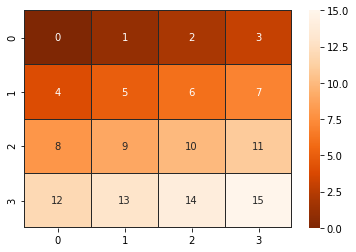

In [4]:
ax = seaborn.heatmap(np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(4, 4), 
                     cmap  = "Oranges_r", 
                     annot = True, 
                     linecolor="#282828", 
                     linewidths = 0.1)

In [5]:
#!pip install lolviz

In [6]:
from lolviz import *

In [8]:
class State: # class for each unit on the game
    def __init__(self, _id):
        
        if _id != 0:
            self.value = 0
        elif _id == 0:
            self.value = 0
            
        self.id = _id
        
        self.left_bound  = max(1,  (self.id // 4) * 4)      # save the left border
        self.right_bound = min(14, (self.id // 4) * 4 + 3)  # save the right border
        
        self.nextS       = [self.move('L'), self.move('R'), self.move('U'), self.move('D')]
        
    def move(self, u):  # get next S
        if u == 'L':    # move left
            if self.id - 1 >= self.left_bound:
                return self.id - 1
            elif self.id - 1 == 0:
                return 0
            else:
                return self.id   
            
        if u == 'R':  # move right
                if self.id + 1 <= self.right_bound:
                    return self.id + 1
                elif self.id + 1 == 15:
                    return 0
                else:
                    return self.id

        if u == 'U':  # move up
            if self.id - 4 >= 1:
                return self.id - 4
            elif self.id - 4 == 0:
                return 0
            else:
                return self.id

        if u == 'D':  # move down
            if self.id + 4 <= 14:
                return self.id + 4
            elif self.id + 4 == 15:
                return 0
            else:
                return self.id        

    def update(self, S):  # S is the whole set of the States.
        V = 0.00000000000
        
        for i in range(0, 4):
            V += S[self.nextS[i]].value
            
        # print("update id " + str(self.id))
        # print("for the " + str(self.nextS[i]))
        # print("old value" + str(self.value))
        # print("new value" + str(S[self.nextS[i]].value))
        
        self.value = -1 + 0.25 * V


╒════╤════╤════╤════╕
│  0 │  1 │  2 │  3 │
├────┼────┼────┼────┤
│  4 │  5 │  6 │  7 │
├────┼────┼────┼────┤
│  8 │  9 │ 10 │ 11 │
├────┼────┼────┼────┤
│ 12 │ 13 │ 14 │ 15 │
╘════╧════╧════╧════╛


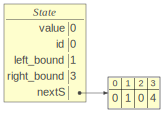

In [9]:
print(tabulate(np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(4, 4),  tablefmt="fancy_grid" ))

s = State(0)
objviz(s)

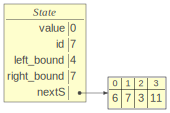

In [10]:
s = State(7)
objviz(s)

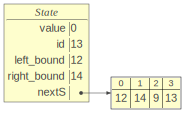

In [11]:
s = State(13)
objviz(s)

In [13]:
V   = []

# 0th state is Terminal state
S_T = State(0)

# dictionary of states
dict_of_all_states   = {0: S_T}

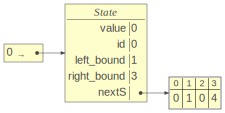

In [14]:
objviz(dict_of_all_states)

In [15]:
# dictionary of all the states (0 to 14)
for j in range(1, 15):
    dict_of_all_states[j] = State(j)

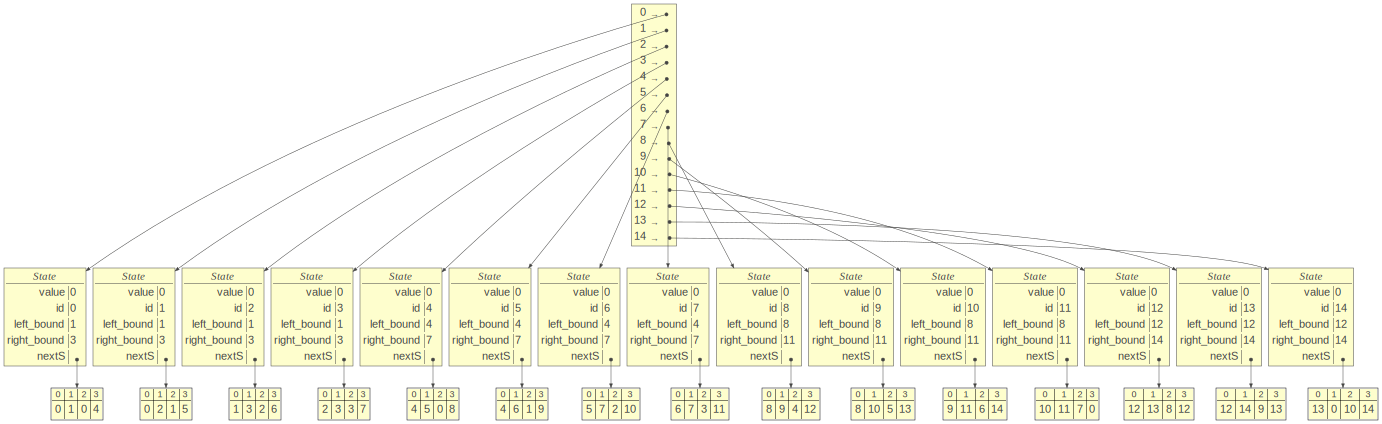

In [16]:
treeviz(dict_of_all_states)

In [17]:
k = 1
value_fn_of_all_states   = []    

S_T = State(0)

dict_of_all_states   = {0: S_T}                   

for j in range(1, 15):
    dict_of_all_states[j] = State(j)

for loop in range(k):
                  
    n = np.random.random()

    if n > 0.5:
        for j in range(1, 15):
            dict_of_all_states[j].update(dict_of_all_states)
    else:
        for j in range(14, 0, -1):
            dict_of_all_states[j].update(dict_of_all_states)
            
for t in range(0, 16):
    if t == 0 or t == 15:
        value_fn_of_all_states.append(0.0000)
    else:
        value_fn_of_all_states.append(np.round(dict_of_all_states[t].value, 6))

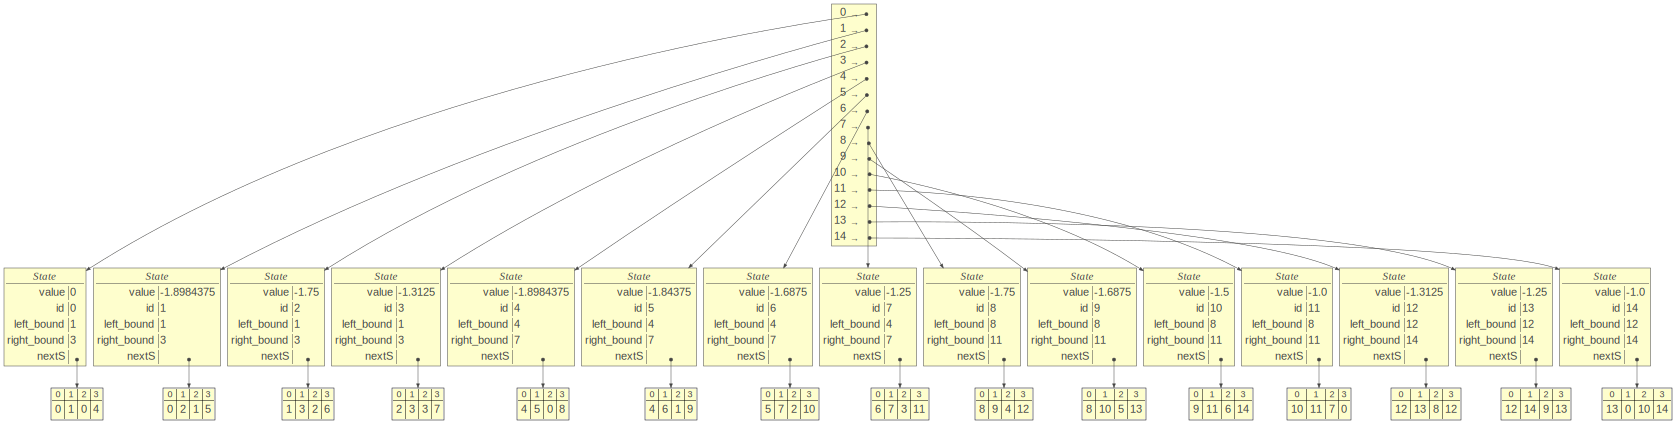

In [18]:
treeviz(dict_of_all_states)

In [19]:
def PE(k=10):
    
    value_fn_of_all_states     = []  
    value_fn_of_all_states_str = []

    S_T = State(0)

    dict_of_all_states   = {0: S_T}                   

    for j in range(1, 15):
        dict_of_all_states[j] = State(j)

    for loop in range(k):

        n = np.random.random()

        if n > 0.5:
            for j in range(1, 15):
                dict_of_all_states[j].update(dict_of_all_states)
        else:
            for j in range(14, 0, -1):
                dict_of_all_states[j].update(dict_of_all_states)

    for t in range(0, 16):
        if t == 0 or t == 15:
            value_fn_of_all_states.append(0.0000)
            value_fn_of_all_states_str.append(str(0))
        else:
            value_fn_of_all_states.append(np.round(dict_of_all_states[t].value, 10))
            value_fn_of_all_states_str.append(str(np.round(dict_of_all_states[t].value, 10)))
            
    return value_fn_of_all_states, value_fn_of_all_states_str, dict_of_all_states

In [20]:
def greedy_policy(dict_of_all_states):
    for key in dict_of_all_states.keys():

        next_states = dict_of_all_states[key].nextS
        cur_val     = dict_of_all_states[key].value

        # get the values of the next states
        next_states_values = []

        for next_state in next_states:
            next_states_values.append(dict_of_all_states[next_state].value)

        # convert the next states values to array                              
        next_states_values_arr = np.array(next_states_values)

        policies = np.where(next_states_values_arr == np.max(next_states_values_arr))[0]   

        greedy_policy = []

        for each_policy in policies:
            if each_policy == 0:
                greedy_policy.append('L')
            if each_policy == 1:
                greedy_policy.append('R')
            if each_policy == 2:
                greedy_policy.append('U')    
            if each_policy == 3:
                greedy_policy.append('D')     

        separator = ''
        greedy_policy = separator.join(greedy_policy)

        print(key, dict_of_all_states[key].nextS, greedy_policy )

Value functions at k = 1
╒══════════╤══════════╤═════════╤═════════╕
│  0       │ -1.89844 │ -1.75   │ -1.3125 │
├──────────┼──────────┼─────────┼─────────┤
│ -1.89844 │ -1.84375 │ -1.6875 │ -1.25   │
├──────────┼──────────┼─────────┼─────────┤
│ -1.75    │ -1.6875  │ -1.5    │ -1      │
├──────────┼──────────┼─────────┼─────────┤
│ -1.3125  │ -1.25    │ -1      │  0      │
╘══════════╧══════════╧═════════╧═════════╛
0 [0, 1, 0, 4] LU
1 [0, 2, 1, 5] L
2 [1, 3, 2, 6] R
3 [2, 3, 3, 7] D
4 [4, 5, 0, 8] U
5 [4, 6, 1, 9] RD
6 [5, 7, 2, 10] R
7 [6, 7, 3, 11] D
8 [8, 9, 4, 12] D
9 [8, 10, 5, 13] D
10 [9, 11, 6, 14] RD
11 [10, 11, 7, 0] D
12 [12, 13, 8, 12] R
13 [12, 14, 9, 13] R
14 [13, 0, 10, 14] R


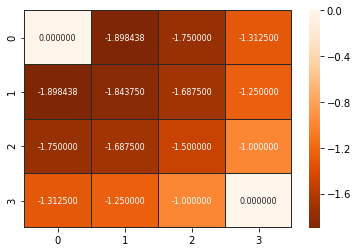

In [21]:
k=1

value_functions, dict_of_all_states_str, dict_of_all_states = PE(k)

print('Value functions at k = {}'.format(k))
print(tabulate(np.array(value_functions).reshape(4, 4),  tablefmt="fancy_grid" ))
greedy_policy(dict_of_all_states)

ax = seaborn.heatmap(np.array(value_functions).reshape(4, 4), 
                     cmap = "Oranges_r", 
                     annot = True, 
                     fmt=".6f",
                     annot_kws={"size":8},
                     linecolor="#282828", 
                     linewidths = 0.1)
    
plt.show()

Value functions at k = 2
╒══════════╤══════════╤══════════╤══════════╕
│  0       │ -2.77092 │ -3.01355 │ -2.66394 │
├──────────┼──────────┼──────────┼──────────┤
│ -2.77092 │ -3.07013 │ -3.14026 │ -2.78076 │
├──────────┼──────────┼──────────┼──────────┤
│ -3.01355 │ -3.14026 │ -3.03027 │ -2.37305 │
├──────────┼──────────┼──────────┼──────────┤
│ -2.66394 │ -2.78076 │ -2.37305 │  0       │
╘══════════╧══════════╧══════════╧══════════╛
0 [0, 1, 0, 4] LU
1 [0, 2, 1, 5] L
2 [1, 3, 2, 6] R
3 [2, 3, 3, 7] RU
4 [4, 5, 0, 8] U
5 [4, 6, 1, 9] LU
6 [5, 7, 2, 10] R
7 [6, 7, 3, 11] D
8 [8, 9, 4, 12] D
9 [8, 10, 5, 13] D
10 [9, 11, 6, 14] RD
11 [10, 11, 7, 0] D
12 [12, 13, 8, 12] LD
13 [12, 14, 9, 13] R
14 [13, 0, 10, 14] R


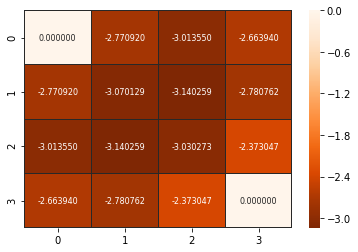

In [22]:
k=2
value_functions, dict_of_all_states_str, dict_of_all_states = PE(k)
print('Value functions at k = {}'.format(k))
print(tabulate(np.array(value_functions).reshape(4, 4),  tablefmt="fancy_grid" ))
greedy_policy(dict_of_all_states)

ax = seaborn.heatmap(np.array(value_functions).reshape(4, 4), 
                     cmap = "Oranges_r", 
                     annot = True, 
                     fmt=".6f",
                     annot_kws={"size":8},
                     linecolor="#282828", 
                     linewidths = 0.1)
    
plt.show()

Value functions at k = 4
╒══════════╤══════════╤══════════╤══════════╕
│  0       │ -3.84961 │ -5.09639 │ -5.39378 │
├──────────┼──────────┼──────────┼──────────┤
│ -3.84961 │ -5.17429 │ -5.78179 │ -5.85085 │
├──────────┼──────────┼──────────┼──────────┤
│ -5.09639 │ -5.78179 │ -5.79458 │ -4.8632  │
├──────────┼──────────┼──────────┼──────────┤
│ -5.39378 │ -5.85085 │ -4.8632  │  0       │
╘══════════╧══════════╧══════════╧══════════╛
0 [0, 1, 0, 4] LU
1 [0, 2, 1, 5] L
2 [1, 3, 2, 6] L
3 [2, 3, 3, 7] L
4 [4, 5, 0, 8] U
5 [4, 6, 1, 9] LU
6 [5, 7, 2, 10] U
7 [6, 7, 3, 11] D
8 [8, 9, 4, 12] U
9 [8, 10, 5, 13] L
10 [9, 11, 6, 14] RD
11 [10, 11, 7, 0] D
12 [12, 13, 8, 12] U
13 [12, 14, 9, 13] R
14 [13, 0, 10, 14] R


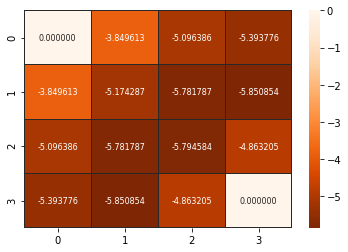

In [23]:
k=4
value_functions, dict_of_all_states_str, dict_of_all_states = PE(k)
print('Value functions at k = {}'.format(k))
print(tabulate(np.array(value_functions).reshape(4, 4),  tablefmt="fancy_grid" ))
greedy_policy(dict_of_all_states)

ax = seaborn.heatmap(np.array(value_functions).reshape(4, 4), 
                     cmap = "Oranges_r", 
                     annot = True, 
                     fmt=".6f",
                     annot_kws={"size":8},
                     linecolor="#282828", 
                     linewidths = 0.1)
    
plt.show()

Value functions at k = 6
╒══════════╤══════════╤══════════╤══════════╕
│  0       │ -6.07166 │ -7.79621 │ -7.78693 │
├──────────┼──────────┼──────────┼──────────┤
│ -6.07166 │ -7.45778 │ -7.88291 │ -7.43034 │
├──────────┼──────────┼──────────┼──────────┤
│ -7.79621 │ -7.88291 │ -7.21642 │ -5.59498 │
├──────────┼──────────┼──────────┼──────────┤
│ -7.78693 │ -7.43034 │ -5.59498 │  0       │
╘══════════╧══════════╧══════════╧══════════╛
0 [0, 1, 0, 4] LU
1 [0, 2, 1, 5] L
2 [1, 3, 2, 6] L
3 [2, 3, 3, 7] D
4 [4, 5, 0, 8] U
5 [4, 6, 1, 9] LU
6 [5, 7, 2, 10] D
7 [6, 7, 3, 11] D
8 [8, 9, 4, 12] U
9 [8, 10, 5, 13] R
10 [9, 11, 6, 14] RD
11 [10, 11, 7, 0] D
12 [12, 13, 8, 12] R
13 [12, 14, 9, 13] R
14 [13, 0, 10, 14] R


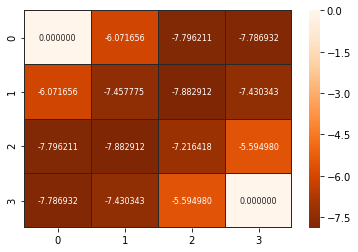

In [24]:
k=6
value_functions, dict_of_all_states_str, dict_of_all_states = PE(k)
print('Value functions at k = {}'.format(k))
print(tabulate(np.array(value_functions).reshape(4, 4),  tablefmt="fancy_grid" ))
greedy_policy(dict_of_all_states)

ax = seaborn.heatmap(np.array(value_functions).reshape(4, 4), 
                     cmap = "Oranges_r", 
                     annot = True, 
                     fmt=".6f",
                     annot_kws={"size":8},
                     linecolor="#282828", 
                     linewidths = 0.1)
    
plt.show()

Value functions at k = 8
╒══════════╤══════════╤══════════╤══════════╕
│  0       │ -6.9989  │ -9.38302 │ -9.86672 │
├──────────┼──────────┼──────────┼──────────┤
│ -6.9989  │ -8.91096 │ -9.652   │ -9.49644 │
├──────────┼──────────┼──────────┼──────────┤
│ -9.38302 │ -9.652   │ -8.89942 │ -7.13568 │
├──────────┼──────────┼──────────┼──────────┤
│ -9.86672 │ -9.49644 │ -7.13568 │  0       │
╘══════════╧══════════╧══════════╧══════════╛
0 [0, 1, 0, 4] LU
1 [0, 2, 1, 5] L
2 [1, 3, 2, 6] L
3 [2, 3, 3, 7] L
4 [4, 5, 0, 8] U
5 [4, 6, 1, 9] LU
6 [5, 7, 2, 10] D
7 [6, 7, 3, 11] D
8 [8, 9, 4, 12] U
9 [8, 10, 5, 13] R
10 [9, 11, 6, 14] RD
11 [10, 11, 7, 0] D
12 [12, 13, 8, 12] U
13 [12, 14, 9, 13] R
14 [13, 0, 10, 14] R


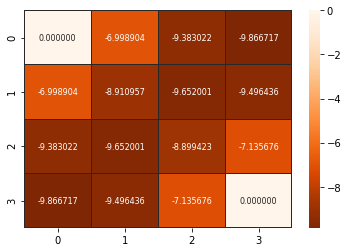

In [25]:
k=8
value_functions, dict_of_all_states_str, dict_of_all_states = PE(k)
print('Value functions at k = {}'.format(k))
print(tabulate(np.array(value_functions).reshape(4, 4),  tablefmt="fancy_grid" ))
greedy_policy(dict_of_all_states)

ax = seaborn.heatmap(np.array(value_functions).reshape(4, 4), 
                     cmap = "Oranges_r", 
                     annot = True, 
                     fmt=".6f",
                     annot_kws={"size":8},
                     linecolor="#282828", 
                     linewidths = 0.1)
    
plt.show()

Value functions at k = 20
╒══════════╤══════════╤══════════╤══════════╕
│   0      │ -11.3008 │ -15.9631 │ -17.4361 │
├──────────┼──────────┼──────────┼──────────┤
│ -11.3008 │ -14.5422 │ -16.1211 │ -16.0968 │
├──────────┼──────────┼──────────┼──────────┤
│ -15.9631 │ -16.1211 │ -14.6372 │ -11.4718 │
├──────────┼──────────┼──────────┼──────────┤
│ -17.4361 │ -16.0968 │ -11.4718 │   0      │
╘══════════╧══════════╧══════════╧══════════╛
0 [0, 1, 0, 4] LU
1 [0, 2, 1, 5] L
2 [1, 3, 2, 6] L
3 [2, 3, 3, 7] L
4 [4, 5, 0, 8] U
5 [4, 6, 1, 9] L
6 [5, 7, 2, 10] L
7 [6, 7, 3, 11] D
8 [8, 9, 4, 12] U
9 [8, 10, 5, 13] U
10 [9, 11, 6, 14] RD
11 [10, 11, 7, 0] D
12 [12, 13, 8, 12] U
13 [12, 14, 9, 13] R
14 [13, 0, 10, 14] R


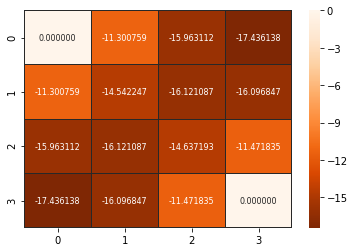

In [26]:
k=20
value_functions, dict_of_all_states_str, dict_of_all_states = PE(k)
print('Value functions at k = {}'.format(k))
print(tabulate(np.array(value_functions).reshape(4, 4),  tablefmt="fancy_grid" ))
greedy_policy(dict_of_all_states)

ax = seaborn.heatmap(np.array(value_functions).reshape(4, 4), 
                     cmap = "Oranges_r", 
                     annot = True, 
                     fmt=".6f",
                     annot_kws={"size":8},
                     linecolor="#282828", 
                     linewidths = 0.1)
    
plt.show()

Value functions at k = 200
╒═════╤═════╤═════╤═════╕
│   0 │ -14 │ -20 │ -22 │
├─────┼─────┼─────┼─────┤
│ -14 │ -18 │ -20 │ -20 │
├─────┼─────┼─────┼─────┤
│ -20 │ -20 │ -18 │ -14 │
├─────┼─────┼─────┼─────┤
│ -22 │ -20 │ -14 │   0 │
╘═════╧═════╧═════╧═════╛
0 [0, 1, 0, 4] LU
1 [0, 2, 1, 5] L
2 [1, 3, 2, 6] L
3 [2, 3, 3, 7] L
4 [4, 5, 0, 8] U
5 [4, 6, 1, 9] LU
6 [5, 7, 2, 10] D
7 [6, 7, 3, 11] D
8 [8, 9, 4, 12] U
9 [8, 10, 5, 13] R
10 [9, 11, 6, 14] RD
11 [10, 11, 7, 0] D
12 [12, 13, 8, 12] U
13 [12, 14, 9, 13] R
14 [13, 0, 10, 14] R


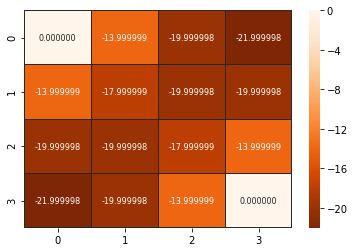

In [27]:
k=200
value_functions, dict_of_all_states_str, dict_of_all_states = PE(k)
print('Value functions at k = {}'.format(k))
print(tabulate(np.array(value_functions).reshape(4, 4),  tablefmt="fancy_grid" ))
greedy_policy(dict_of_all_states)

ax = seaborn.heatmap(np.array(value_functions).reshape(4, 4), 
                     cmap = "Oranges_r", 
                     annot = True, 
                     fmt=".6f",
                     annot_kws={"size":8},
                     linecolor="#282828", 
                     linewidths = 0.1)
    
plt.show()

In [ ]:
0 [0, 1, 0, 4] LU
1 [0, 2, 1, 5] L
2 [1, 3, 2, 6] L
3 [2, 3, 3, 7] L
4 [4, 5, 0, 8] U
5 [4, 6, 1, 9] L
6 [5, 7, 2, 10] L
7 [6, 7, 3, 11] D
8 [8, 9, 4, 12] U
9 [8, 10, 5, 13] U
10 [9, 11, 6, 14] RD
11 [10, 11, 7, 0] D
12 [12, 13, 8, 12] U
13 [12, 14, 9, 13] R
14 [13, 0, 10, 14] R